In [ ]:
# write code to load ariline the data 

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

In [2]:
use_cols = [
    # 29 columns out of 109
    "Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime",
    "ArrTime", "CRSArrTime", "Reporting_Airline","Flight_Number_Reporting_Airline", 
    "Tail_Number", "ActualElapsedTime", "CRSElapsedTime", "AirTime", "ArrDelay", "DepDelay", "Origin", "Dest",
    "Distance", "TaxiIn", "TaxiOut", "Cancelled",
    "CancellationCode", "Diverted", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay",
    "LateAircraftDelay"
]

In [5]:
total_rows = sum(1 for _ in open('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv')) - 1
sample_size = 100000
skip_indices = sorted(random.sample(range(1, total_rows + 1), total_rows - sample_size))

reader = pd.read_csv(
    'On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',
    usecols=use_cols,
    skiprows=skip_indices,
    chunksize=1000
)
jan = pd.concat([chunk for chunk in reader])

In [6]:
# randomly sample 100k observations and perform analysis on this subset
jan = jan.sample(n=100000,random_state=1)

Please read the variable info at 'readme.html', choose at least two sets of variables to analyze including but not limited to, showing their basic statistic and visualization.
Brief explain what you found. For example, you can show correlation between several variables and explain why their relation make sense, or discover skewness, outlier etc for certain variables.

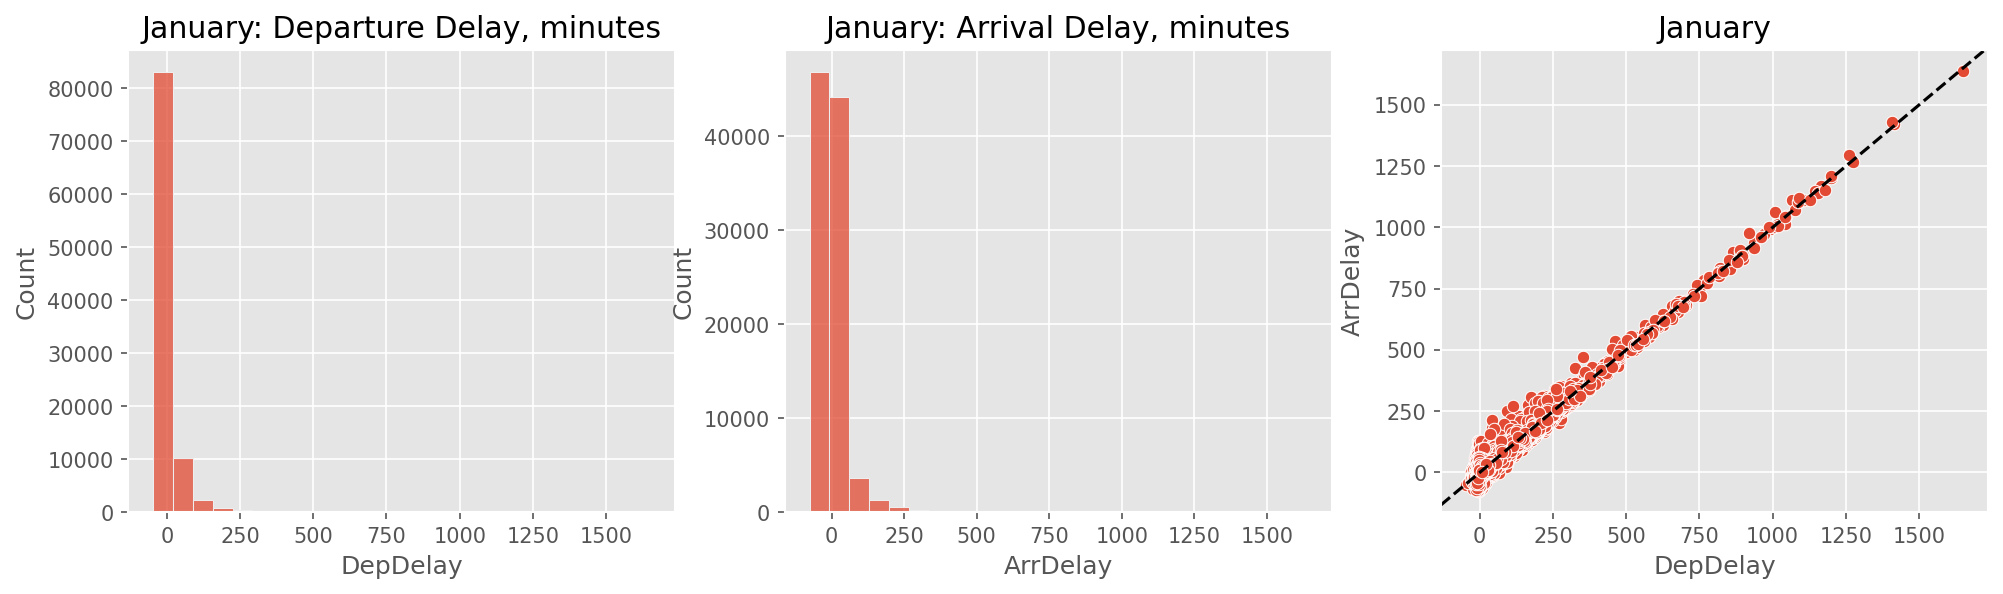

In [16]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

### January data ###
_ = sns.histplot(jan,x='DepDelay',ax=axs[0],bins=25)
_ = axs[0].set_title('January: Departure Delay, minutes')

_ = sns.histplot(jan,x='ArrDelay',ax=axs[1],bins = 25)
_ = axs[1].set_title('January: Arrival Delay, minutes')

_ = sns.scatterplot(jan,x='DepDelay',y='ArrDelay',ax=axs[2])
_ = axs[2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[2].set_title('January')

In [25]:
jan_df = pd.DataFrame(jan)
jan_ArrDep = jan_df[['ArrDelay','DepDelay']]

In [26]:
# Calculate correlation
correlation = jan_ArrDep.corr()

# Display the correlation matrix
print(correlation)

          ArrDelay  DepDelay
ArrDelay  1.000000  0.957095
DepDelay  0.957095  1.000000


The variables arrivale delay and departure delay are highly coorelated. This makes sense as if there is a delay during departure, the plane would take off late and start making its journey to the final destination later which could push back the times for the rest of the planes journey. However it makes sense they do not perfectly match as it is possible a delayed flight will be prioritized when being placed at a gate or a delay might occur upon arrival at a busy airport even though the plane left the first airport on time.

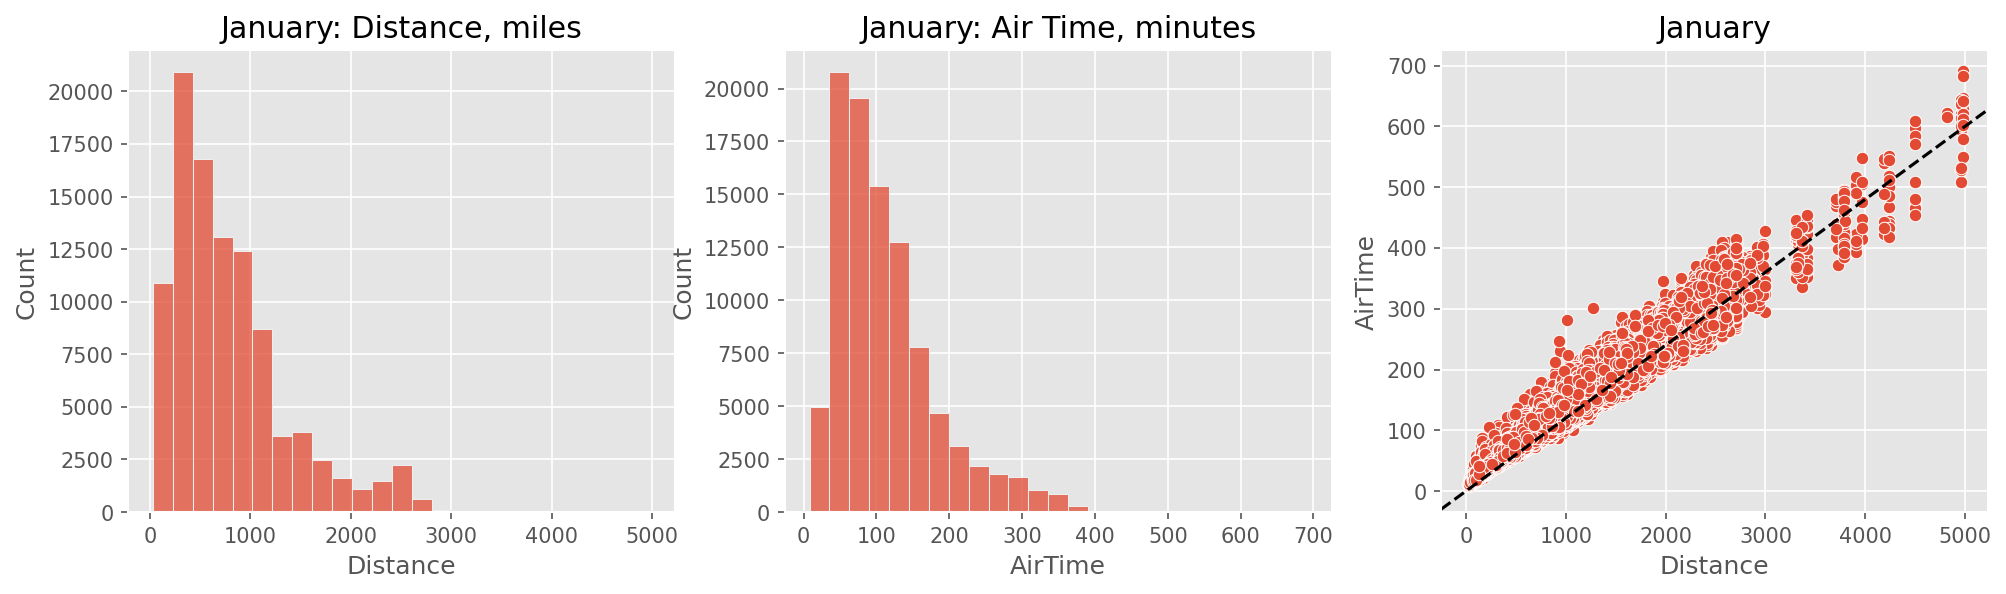

In [33]:
fig,axs = plt.subplots(1,3,figsize=(16,4))

### January data ###
_ = sns.histplot(jan,x='Distance',ax=axs[0],bins=25)
_ = axs[0].set_title('January: Distance, miles')

_ = sns.histplot(jan,x='AirTime',ax=axs[1],bins = 25)
_ = axs[1].set_title('January: Air Time, minutes')

_ = sns.scatterplot(jan,x='Distance',y='AirTime',ax=axs[2])
_ = axs[2].axline((0, 0), slope=0.12,color='black',linestyle='dashed')
_ = axs[2].set_title('January')

In [34]:
jan_DistAT = jan_df[['Distance','AirTime']]

In [35]:
# Calculate correlation
correlation = jan_DistAT.corr()

# Display the correlation matrix
print(correlation)

          Distance   AirTime
Distance  1.000000  0.978594
AirTime   0.978594  1.000000


The variables distance and arrival time are highly coorelated. This makes sense as if a distance is farther, it takes more time to get there if speed is constant. However, the air time can also be altered by the speed at which the plane is going at or the winds that are going with or against the plane which might explain the variability. 